# ANIME RECOMMENDATION SYSTEM

## Muhammet Öztürk                   
## ID:150200328

<img src="https://i.imgur.com/GNnbyOg.png" style="text-align: center;" width="500">


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import operator

## Data Import

<!-- This section is crucial as it sets the stage for the project by importing and describing the datasets. Understanding the structure and content of these datasets is key to the analyses that follow. -->

*Note: This section is crucial as it sets the stage for the project by importing and describing the datasets. Understanding the structure and content of these datasets is key to the analyses that follow.*

For this project, I employed two comprehensive datasets, "anime_a.csv" and "rating.csv," which provided a wealth of information. The "anime_a.csv" file was instrumental in offering detailed insights into various anime series, encompassing aspects such as genre, rating, and member details. Meanwhile, the "rating.csv" file served as a crucial resource for understanding user engagement, featuring extensive data on user ratings, viewer preferences, and rating points assigned to each anime. This combination of datasets allowed for a nuanced analysis of the anime industry from both content and audience reception perspectives

In [2]:
anime_df=pd.read_csv("anime_a.csv")
rating_df=pd.read_csv("rating.csv")

In [3]:
rating_df['anime_id']
anime_df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [4]:
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [5]:
print("shape:",anime_df.shape)
anime_df.dtypes
rating_df.shape

shape: (12294, 7)


(7813737, 3)

# Data Preparation and Analyze

<!-- In this section, data preparation and initial analysis are performed. It's essential to clean and structure the data properly to ensure accurate results. The analysis of the correlation between members and ratings provides insights into the dynamics of anime popularity and quality. -->

*In this section, data preparation and initial analysis are performed. It's essential to clean and structure the data properly to ensure accurate results. The analysis of the correlation between members and ratings provides insights into the dynamics of anime popularity and quality.*

In [6]:
anime_df = anime_df.dropna(subset=['genre'])

def filling_the_missing_values(row):
    if pd.isna(row['type']):
        row['type'] = 'Unknown'
    if pd.isna(row['rating']):
        row['rating'] = anime_df['rating'].mean()
    return row

anime_df = anime_df.apply(filling_the_missing_values, axis=1)

anime_df.isna().sum()


anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [7]:
anime_df.duplicated().sum()

0

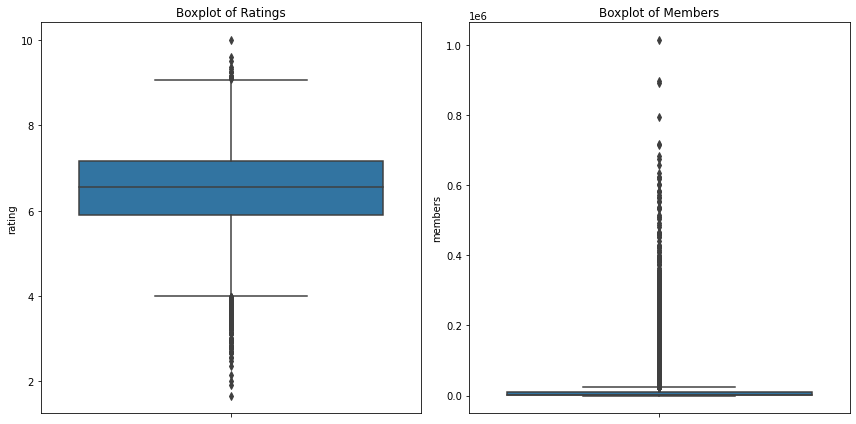

,rating,members
count,12232.000000,1.223200e+04
mean,6.478264,1.815922e+04
std,1.014818,5.494528e+04
min,1.670000,5.000000e+00
25%,5.900000,2.297500e+02
50%,6.550000,1.572000e+03
75%,7.170000,9.494000e+03
max,10.000000,1.013917e+06


In [8]:
stat_summary = anime_df[['rating', 'members']].describe()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=anime_df['rating'])
plt.title('Boxplot of Ratings')

plt.subplot(1, 2, 2)
sns.boxplot(y=anime_df['members'])
plt.title('Boxplot of Members')

plt.tight_layout()
plt.show()

stat_summary


In [9]:
Q1 = anime_df['members'].quantile(0.25)
Q3 = anime_df['members'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR





rating_min = anime_df['rating'].min()
rating_max = anime_df['rating'].max()
rating_third = (rating_max - rating_min) / 3
def categorize_rating(rating):
    if rating < rating_min + rating_third:
        return 'Low'
    elif rating < rating_min + 2 * rating_third:
        return 'Medium'
    else:
        return 'High'
anime_df['rating_category'] = anime_df['rating'].apply(categorize_rating)
anime_df.tail(50)

,anime_id,name,genre,type,episodes,rating,members,rating_category
12244,11141,Blue Seagull,"Action, Hentai",Movie,1,4.600000,337,Medium
12245,6903,Prima Donna Mai,Hentai,OVA,1,4.530000,442,Medium
12246,5589,Offside Girl,"Hentai, Sports",OVA,2,4.300000,945,Low
12247,4310,Joshidai: Ecchi Soudanshitsu,Hentai,OVA,1,3.700000,779,Low
12248,5569,Tsui no Sora,Hentai,OVA,1,2.980000,934,Low
12249,18483,Bishoujo Animerama: Manami no Michi Tono Sou N...,"Hentai, Sci-Fi",OVA,1,3.250000,214,Low
12250,18479,Bishoujo Animerama: Minami no Watashi no Heart...,"Hentai, Romance",OVA,1,3.490000,213,Low
12251,33960,Chou Do M na Hentai Mesu-tachi Otokoton Chouky...,Hentai,OVA,Unknown,8.380000,161,High
12252,34382,Citrus,"Drama, Romance, School, Yuri",Unknown,Unknown,6.478264,2459,Medium
12253,29307,Classical Sex-Zone,"Hentai, School",OVA,3,5.150000,159,Medium


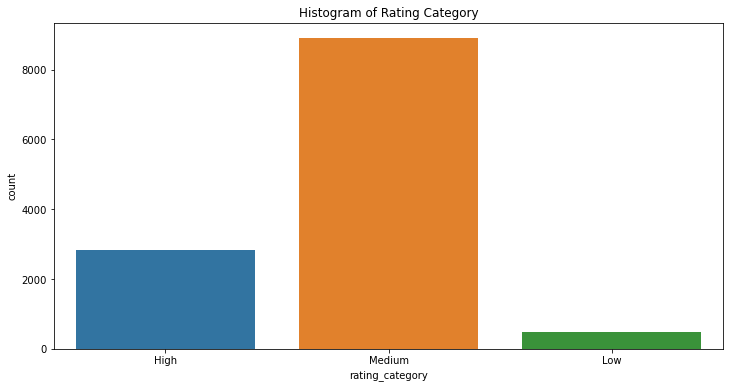

In [10]:
# histogram graph of rating_category, make much more good look
plt.figure(figsize=(12, 6))
sns.countplot(x='rating_category', data=anime_df)
plt.title('Histogram of Rating Category')
plt.show()

<AxesSubplot:xlabel='type', ylabel='rating'>

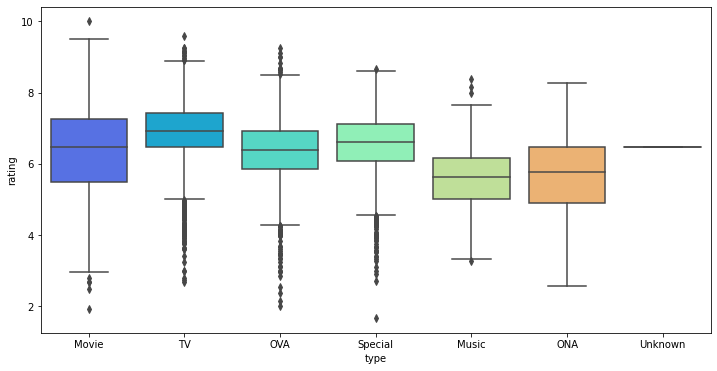

In [11]:
plt.figure(figsize=(12, 6))

sns.boxplot(x="type", y="rating", data=anime_df,palette='rainbow')


In [12]:
# sum of each genres
genre_count = {}
for genres in anime_df['genre']:
    if isinstance(genres, str):
        for genre in genres.split(', '):
            if genre in genre_count:
                genre_count[genre] += 1
            else:
                genre_count[genre] = 1
genre_count

{'Drama': 2016,
 'Romance': 1464,
 'School': 1220,
 'Supernatural': 1037,
 'Action': 2845,
 'Adventure': 2348,
 'Fantasy': 2309,
 'Magic': 778,
 'Military': 426,
 'Shounen': 1712,
 'Comedy': 4645,
 'Historical': 806,
 'Parody': 408,
 'Samurai': 148,
 'Sci-Fi': 2070,
 'Thriller': 87,
 'Sports': 543,
 'Super Power': 465,
 'Space': 381,
 'Slice of Life': 1220,
 'Mecha': 944,
 'Music': 860,
 'Mystery': 495,
 'Seinen': 547,
 'Martial Arts': 265,
 'Vampire': 102,
 'Shoujo': 603,
 'Horror': 369,
 'Police': 197,
 'Psychological': 229,
 'Demons': 294,
 'Ecchi': 637,
 'Josei': 54,
 'Shounen Ai': 65,
 'Game': 181,
 'Dementia': 240,
 'Harem': 317,
 'Cars': 72,
 'Kids': 1609,
 'Shoujo Ai': 55,
 'Hentai': 1141,
 'Yaoi': 39,
 'Yuri': 42}

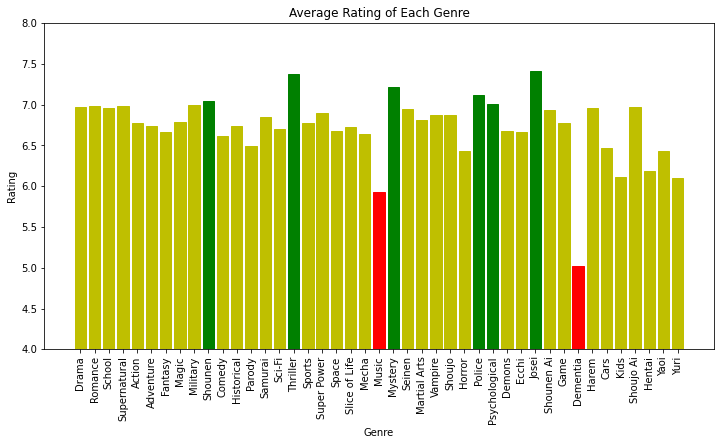

In [13]:
# rating of each genres
genre_rating = {}
for index, row in anime_df.iterrows():
    if isinstance(row['genre'], str):
        for genre in row['genre'].split(', '):
            if genre in genre_rating:
                genre_rating[genre].append(row['rating'])
            else:
                genre_rating[genre] = [row['rating']]
for genre in genre_rating:
    genre_rating[genre] = np.mean(genre_rating[genre])
genre_rating

# plot the rating of each genres
plt.figure(figsize=(12, 6))
plt.bar(genre_rating.keys(), genre_rating.values())
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Average Rating of Each Genre')
plt.ylim(4, 8)
# set each bar's color
for i, v in enumerate(genre_rating.values()):
    if v < 6:
        plt.gca().get_children()[i].set_color('r')
    elif v < 7:
        plt.gca().get_children()[i].set_color('y')
    else:
        plt.gca().get_children()[i].set_color('g')
plt.show()

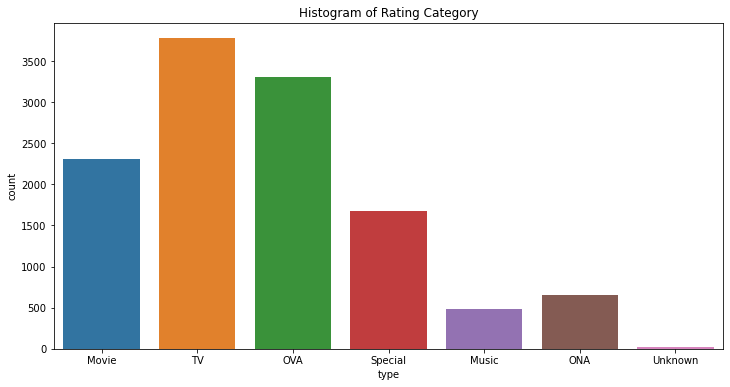

In [14]:
# histogram graph of rating_category, make much more good look
plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=anime_df)
plt.title('Histogram of Rating Category')
plt.show()

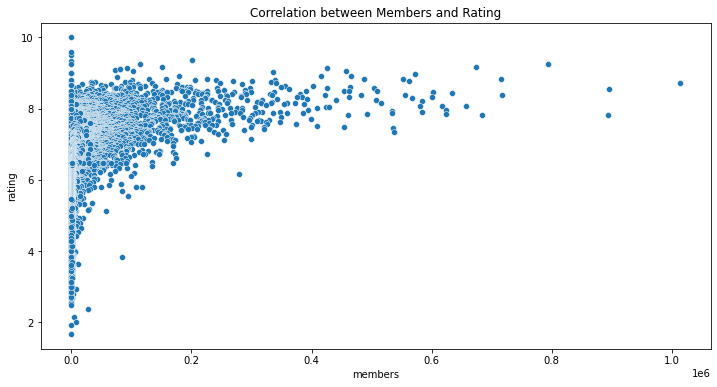

('Correlation between members and ratings:', 0.3880631945449148)

In [15]:
# correlation between members and rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='members', y='rating', data=anime_df)
plt.title('Correlation between Members and Rating')
plt.show()
'Correlation between members and ratings:',anime_df['members'].corr(anime_df['rating'])

Our analysis revealed a positive, yet weak, linear correlation between the number of members and the ratings of anime. This suggests that higher member counts often align with higher ratings, but the relationship is not strongly pronounced, indicating that other factors beyond mere popularity also play a crucial role in determining an anime's rating.

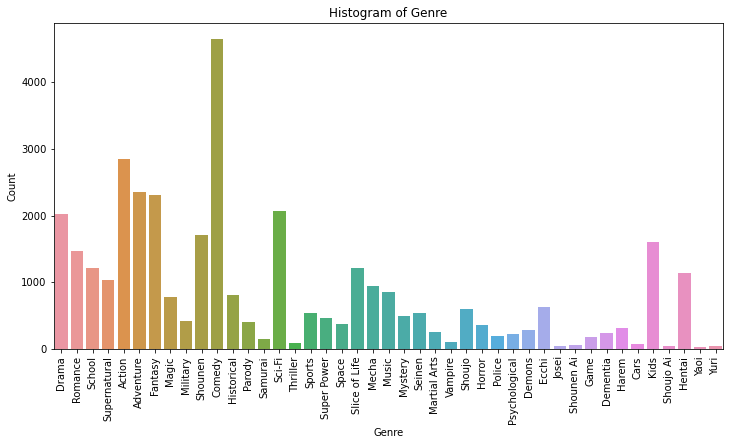

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_count.keys()), y=list(genre_count.values()))
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Histogram of Genre')
plt.show()

In [17]:
anime_df.shape

(12232, 8)

In [18]:
anime_df.dtypes

anime_id             int64
name                object
genre               object
type                object
episodes            object
rating             float64
members              int64
rating_category     object
dtype: object

In [19]:
rating_df.T

,0,1,2,3,4,5,6,7,8,9,...,7813727,7813728,7813729,7813730,7813731,7813732,7813733,7813734,7813735,7813736
user_id,1,1,1,1,1,1,1,1,1,1,...,73515,73515,73515,73515,73515,73515,73515,73515,73516,73516
anime_id,20,24,79,226,241,355,356,442,487,846,...,13161,13331,13599,13659,14345,16512,17187,22145,790,8074
rating,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,8,9,7,8,7,7,9,10,9,9


In [20]:
anime_df.rename(columns={"rating": "anime_rating"}, inplace=True)
rating_df.rename(columns={"rating": "user_rating"}, inplace=True)
anime_df.shape

(12232, 8)

In [21]:
rating_df = rating_df.reset_index(drop=True)

rating_df



,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [22]:
anime_df['name'].value_counts().sort_values(ascending=False)

Shi Wan Ge Leng Xiaohua                         2
Saru Kani Gassen                                2
Girls und Panzer der Film: Arisu War!           1
Clannad: After Story                            1
Koe no Katachi                                  1
                                               ..
Teleclub no Himitsu                             1
Tenshi no Habataki Jun                          1
The Satisfaction                                1
Toushindai My Lover: Minami tai Mecha-Minami    1
Yasuji no Pornorama: Yacchimae!!                1
Name: name, Length: 12230, dtype: int64

<center><img src="https://i.imgur.com/LLXhQ2c.jpg" width="600" height="500"></center>

# Cosine Similarity For Anime Recommendation

**formula:**
![](https://cdn-images-1.medium.com/max/579/1*5hJibEtQPavnbgRxg8w2Fg.gif)

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction.

<!-- Here, the concept of cosine similarity is applied to build the anime recommendation system. This technique is fundamental in understanding how different animes are related based on user preferences and ratings, enabling the system to make tailored recommendations. -->

*Note: Here, the concept of cosine similarity is applied to build the anime recommendation system. This technique is fundamental in understanding how different animes are related based on user preferences and ratings, enabling the system to make tailored recommendations.*

In [23]:
rating_df = rating_df[rating_df.user_id <= 10000]

In [24]:
rating_df = rating_df.drop_duplicates(['user_id', 'anime_id'])

In [25]:
user_item_matrix = rating_df.pivot(index='user_id', columns='anime_id', values='user_rating')


In [26]:
user_similarity = cosine_similarity(user_item_matrix.fillna(0))

In [27]:
def user_based_recommendations(user_id, user_item_matrix, user_similarity, n=5):
    # Get the similarity scores for the target user
    user_scores = user_similarity[user_id - 1]
    
    # Sort users by similarity in descending order
    similar_users = sorted(enumerate(user_scores), key=lambda x: x[1], reverse=True)
    
    # Initialize a list to store recommended anime
    recommended_anime = []
    
    for user, score in similar_users[1:]:  # Exclude the target user
        # Get the anime the similar user has rated positively
        rated_anime = user_item_matrix.loc[user_item_matrix.index[user - 1]]
        positively_rated_anime = rated_anime[rated_anime >= 6].index
        
        # Exclude anime the target user has already rated
        target_user_rated_anime = user_item_matrix.loc[user_id].dropna().index
        recommended_anime.extend(set(positively_rated_anime) - set(target_user_rated_anime))
        
        # Limit the number of recommendations
        if len(recommended_anime) >= n:
            break
    
    return recommended_anime[:n]

In [28]:
# Calculate item similarity using cosine similarity
item_similarity = cosine_similarity(user_item_matrix.fillna(0).T)

In [29]:
def item_based_recommendations(user_id, user_item_matrix, item_similarity, n=5):
    # Get the anime the user has rated positively
    positively_rated_anime = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] >= 6].index
    
    # Initialize a list to store recommended anime
    recommended_anime = []
    
    for anime_id in positively_rated_anime:
       
        
        if 0 <= (anime_id - 1) < len(item_similarity):
            similar_anime = item_similarity[anime_id - 1]
      
        similar_anime_sorted = sorted(enumerate(similar_anime), key=lambda x: x[1], reverse=True)
        
        for anime, score in similar_anime_sorted[1:]:  # Exclude the liked anime
            # Exclude anime the user has already rated
            user_rated_anime = user_item_matrix.loc[user_id].dropna().index
            if anime not in user_rated_anime:
                recommended_anime.append(anime)
            
            # Limit the number of recommendations
            if len(recommended_anime) >= n:
                break
    
    return recommended_anime[:n]

In [30]:
user_id = 9655  # Replace with the user ID you want to test

# Test user-based recommendations
user_recommendations = user_based_recommendations(user_id, user_item_matrix, user_similarity, n=5)

# Test item-based recommendations
item_recommendations = item_based_recommendations(user_id, user_item_matrix, item_similarity, n=5)

In [31]:
print(f"User-Based Recommendations for User {user_id}:")
for anime_id in user_recommendations:
    anime_name = anime_df.loc[anime_df['anime_id'] == anime_id, 'name'].values[0]
    print(f"- {anime_name}")

print(f"\nItem-Based Recommendations for User {user_id}:")
for anime_id in item_recommendations:
    anime_name = anime_df.loc[anime_df['anime_id'] == anime_id, 'name'].values[0]
    print(f"- {anime_name}")

User-Based Recommendations for User 9655:
- Majo no Takkyuubin
- Heisei Tanuki Gassen Ponpoko
- Kamikaze Kaitou Jeanne
- Pokemon
- Digimon Adventure Movie

Item-Based Recommendations for User 9655:
- Mahoromatic 2
- Dragon Ball Z Movie 09: Ginga Girigiri!! Bucchigiri no Sugoi Yatsu
- Mugen Senki Portriss
- Ergo Proxy
- Twilight Q


<h2 style='text-align:center;font-family:Comic Sans MS;font-size:30px;background-color:purple;border:30px;color:white'>The End<h2>